# 1. Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # checking fot total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age**, **Cabin** 그리고 **Emabarkd** 에 null values가 존재함.

- 생존자의 수 확인

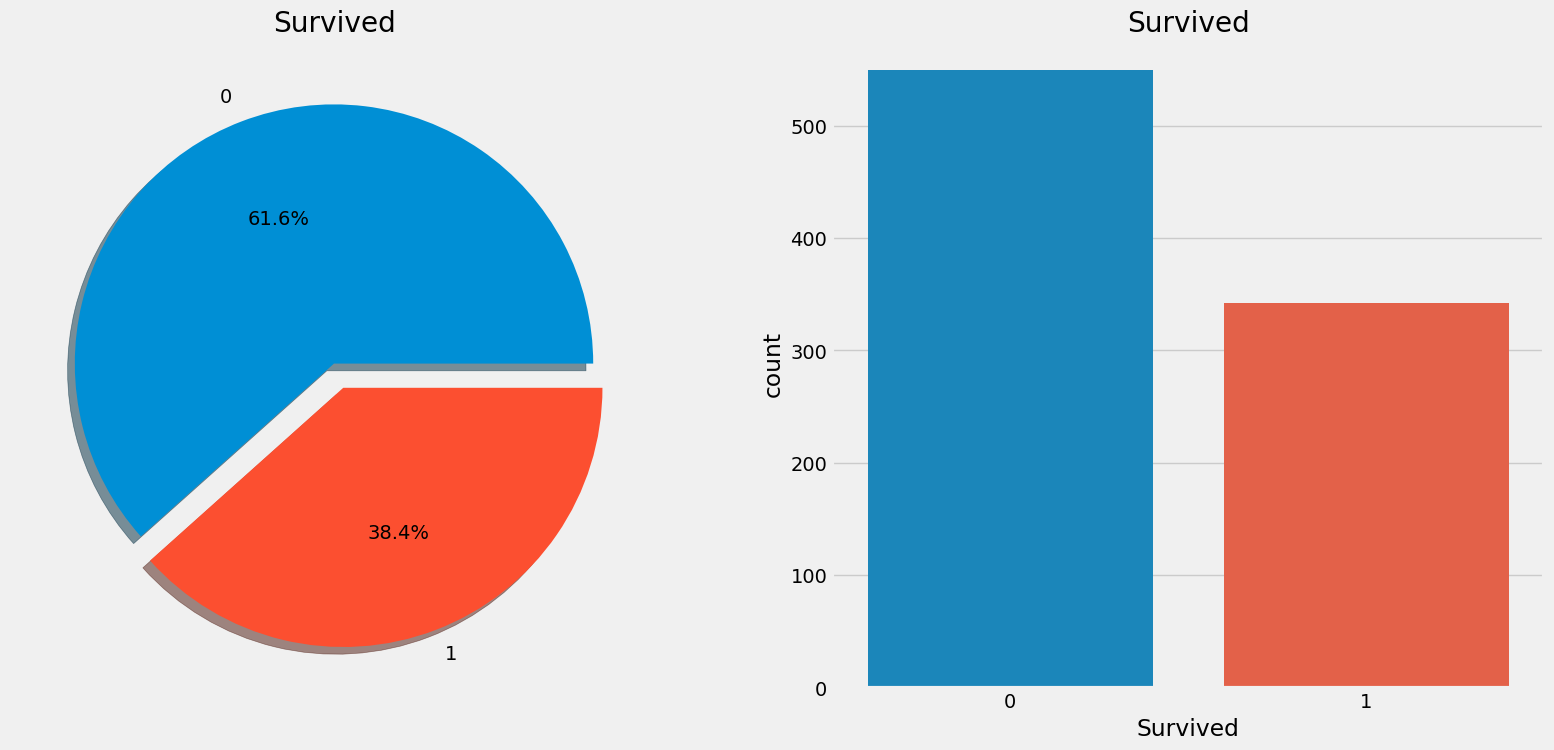

In [5]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%",ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 훈련세트에 포함된 891명중 350명만 생존함. 약 38.4%의 비율임.
- 어떤 범주의 승객이 생존했는지 알아보기 위해 feature에 대한 분석이 필요함.

## 1-1. Types of Features

**Categorical Features(범주형 변수)**
- 범주형 변수는 두개 이상의 범주를 가진 변수.
- 범주형 변수는 정렬하거나 순서를 지정할 수 없음.
- 이러한 변수를 Nominal Variables라고도 함.

ex) Sex, Embarked

**Ordinal Feature(서수형 변수)**
- 값사이에 상대적인 순서가 존재함.

ex) PClass

**Continous Feature(연속형 변수)**
- 두 점사이 또는 열의 최소값 최대값 사이의 값을 취할 수 있는 경우.

ex) Age

## 1-2. Analysing The Features

### 1-2-1. Sex (Categorical Feature)

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

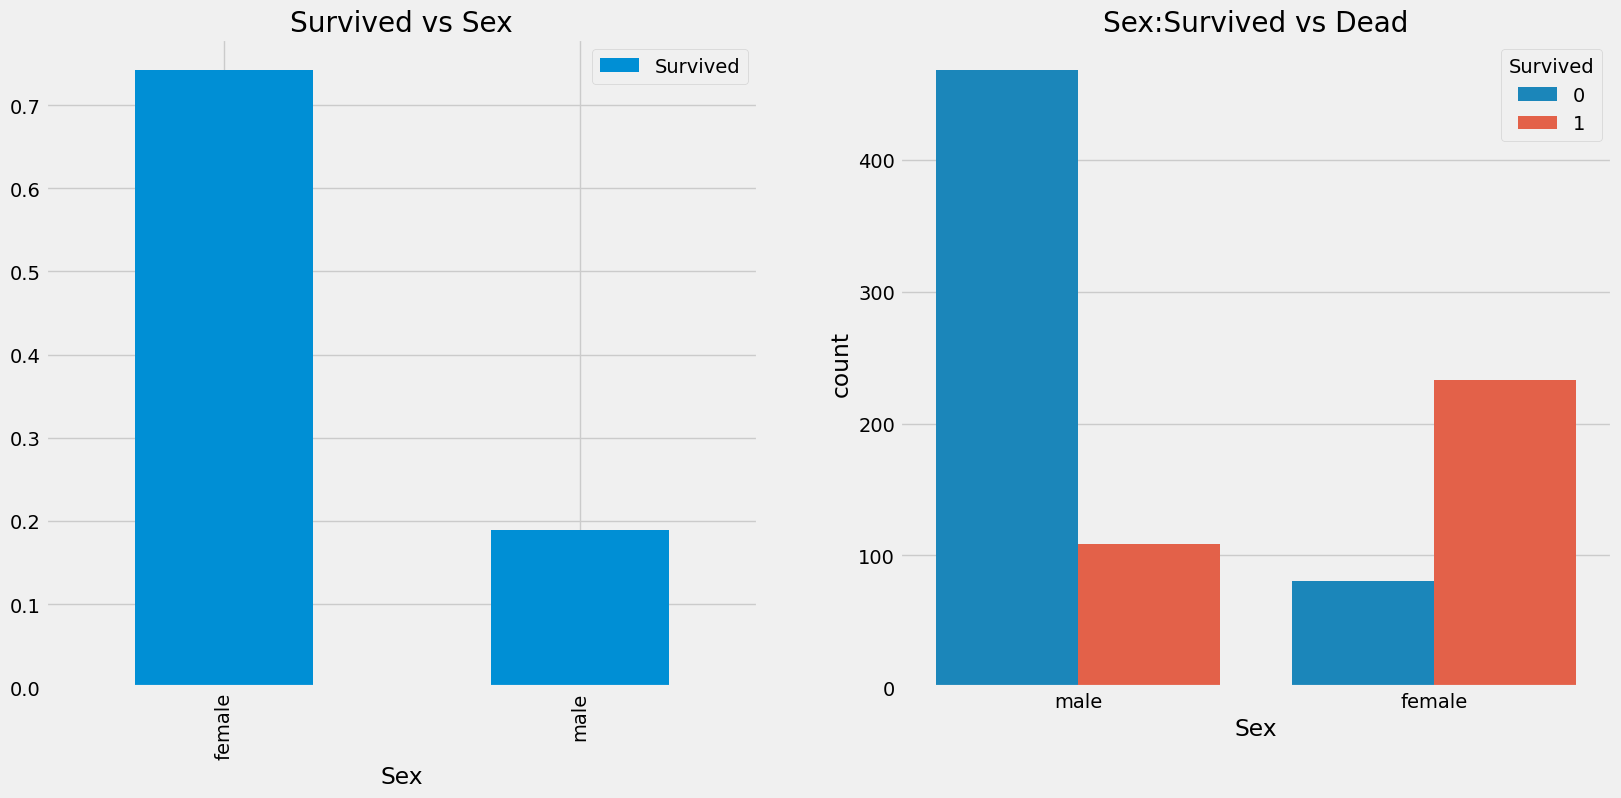

In [7]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- 배에 탄 남성의 수는 여성의 수보다 훨씬 많음.
- 하지만 생존자 중 여성의 수는 남성의 수보다 거의 두배가 많음.
- 배에 탄 여성의 생존확률은 약 75%, 남성의 생존확률은 약 18~19%

### 1-2-2. Pclass (Ordinal Feature)

In [8]:
pd.crosstab(data.Pclass, data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


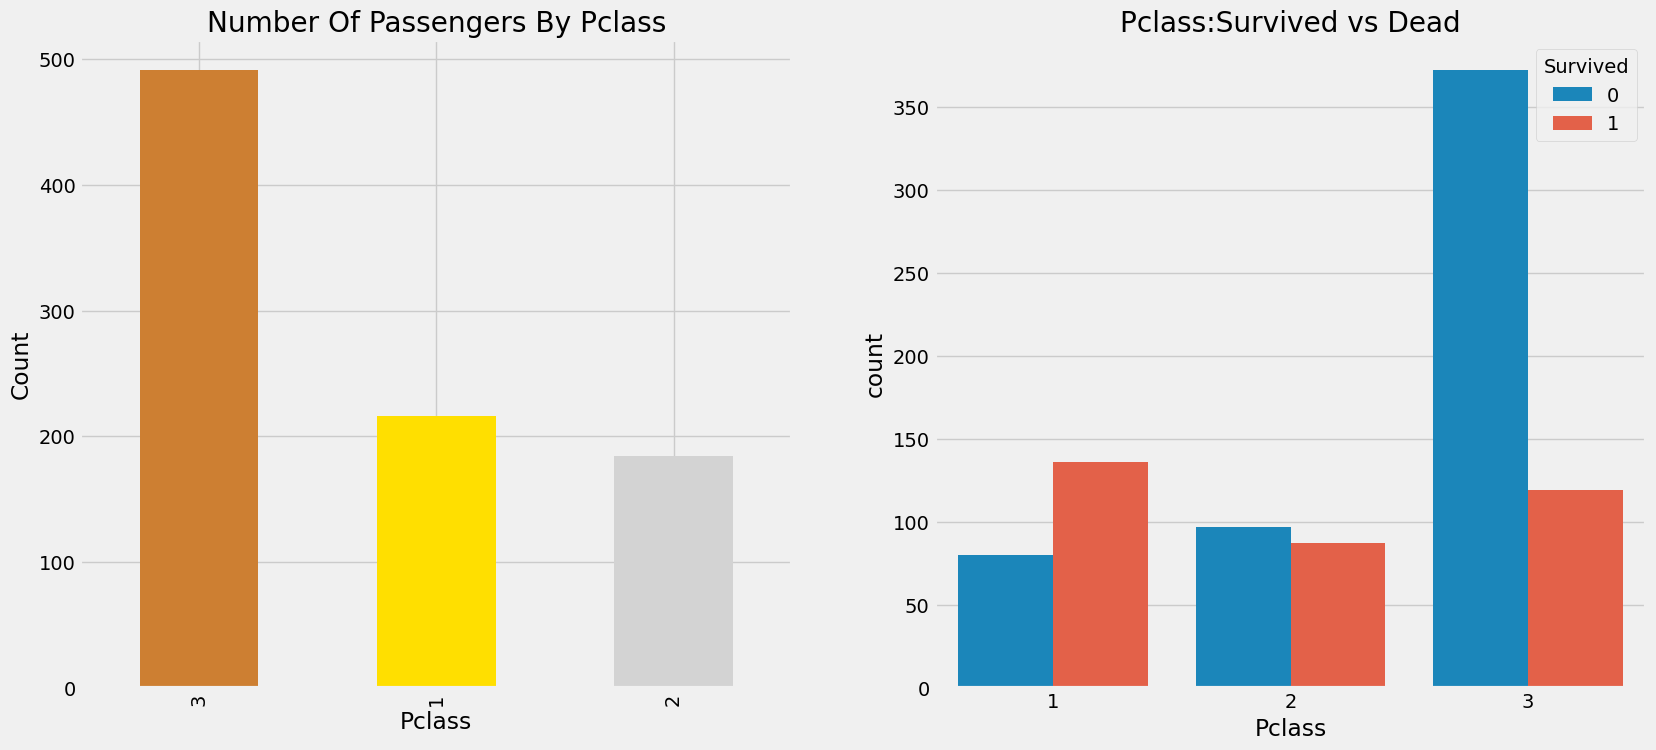

In [9]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue= 'Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- Pclass 1의 경우 생존율이 약 63%이고 2의 경우 48%임.
- 3의 경우 탑승객의 숫자는 훨씬 많지만, 약 25%만 생존한 것을 확인할 수 있음.

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

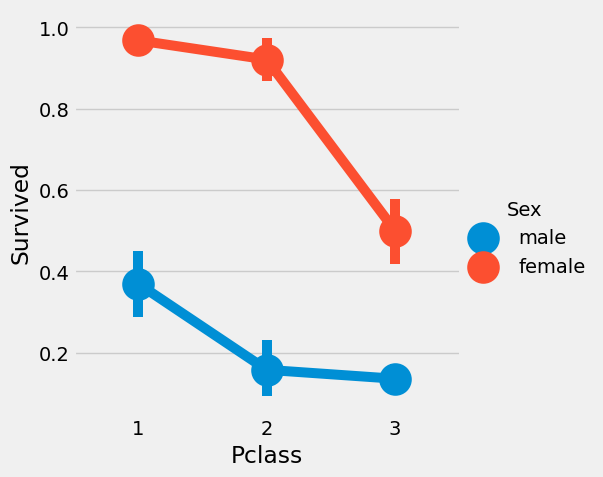

In [11]:
sns.catplot(x='Pclass',y='Survived',hue = 'Sex',data=data,kind='point')
plt.show()

- Pclass 1의 여성 94명 중 3명만 사망했기 때문에, Pclass 1 여성의 생존율이 약 95~96%라는 것을 추론할 수 있음.
- Pclass에 관계없이 구조하는 동안 여성이 최우선 순위를 차지한 것은 분명함.
- Pclass 1의 남성도 생존율이 낮음.

### 1-2-3. Age (Continous Feature)

In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


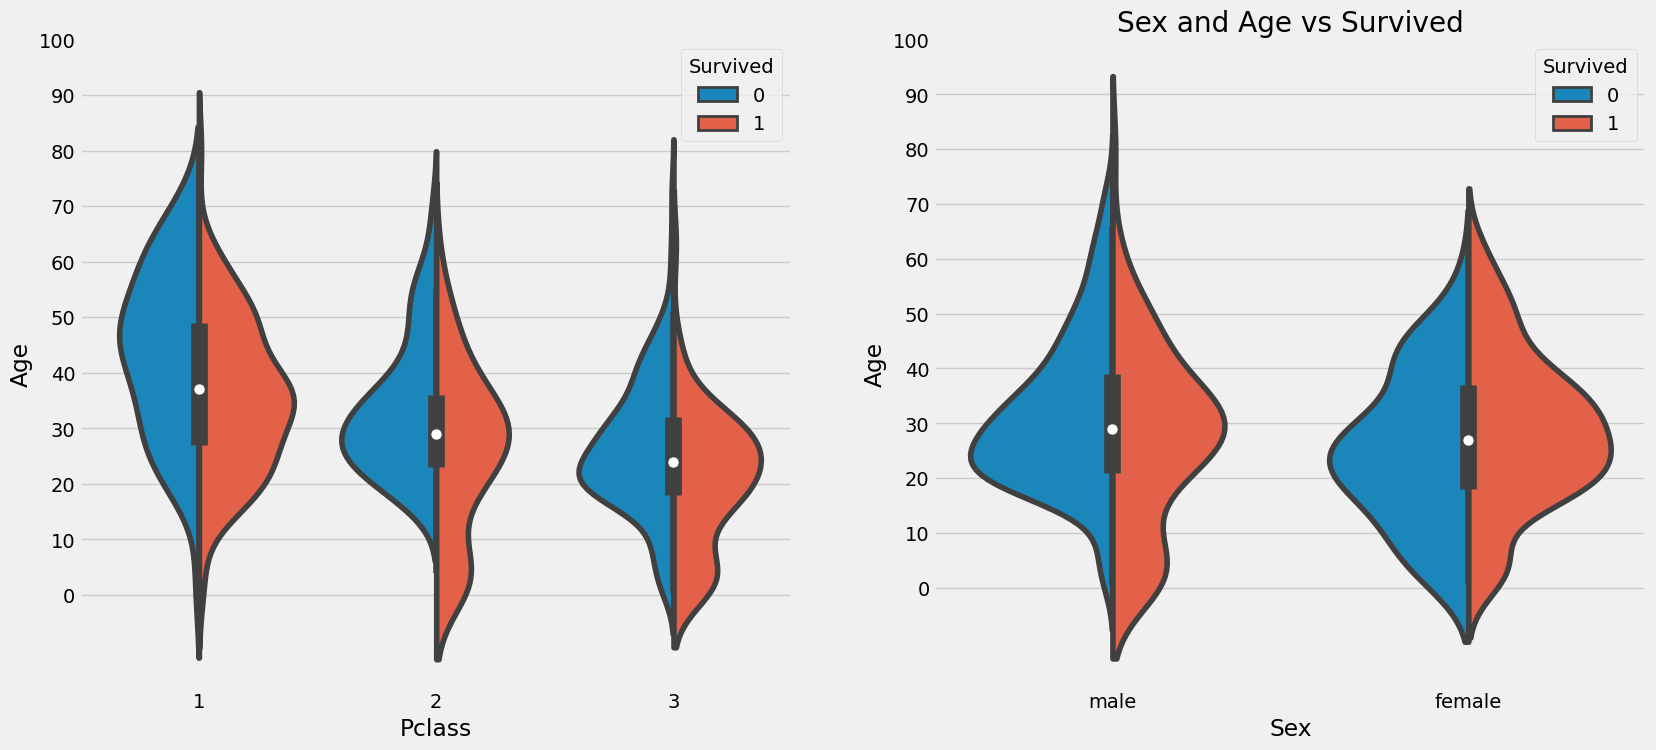

In [13]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age",hue="Survived",data=data,split=True,ax=ax[0])
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age",hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

- 어린이 수는 Pclass에 따라 증가하며, 10세 미만의 승객의 생존확률은 Pclass에 관계없이 양호함.
- Pclass1의 20-50대 탑승객의 생존가능성은 높으며, 여성의 경우 훨씬 더 좋음.
- 남성의 경우 연경이 증가 할 수록 생존가능성이 감소함.

- Age에는 177개의 null값이 존재하기 때문에 대체값이 필요함.
- 이름을 사용해서 각 이름의 Initial에 해당하는 나이의 평균값을 할당하면 됨.

In [14]:
data['Initial'] = 0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

- Filling NaN Ages

In [18]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
data.Age.isnull().any()

False

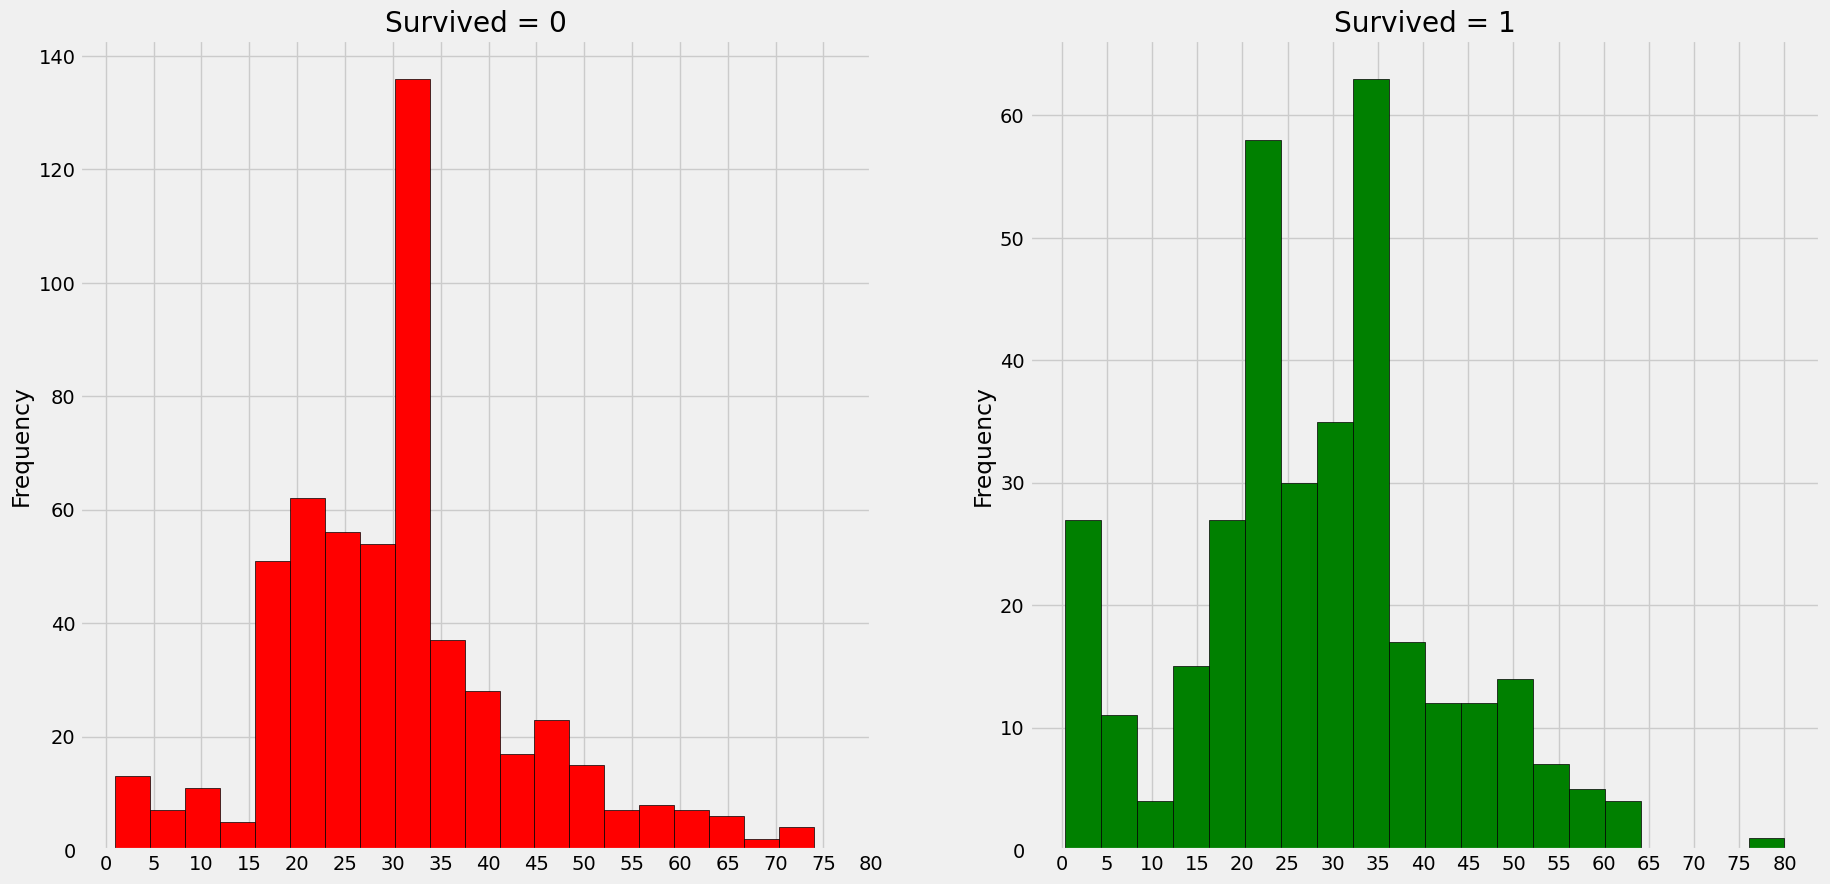

In [20]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

- 5세미만의 유아들의 대부분이 구조 되었음.(여성과 아이들 먼저 구조)
- 가장 고령의 탑승객이 구조됨.(80세)
- 가장 많은 수의 사망자들은 30-40대의 그룹에서 나타남.

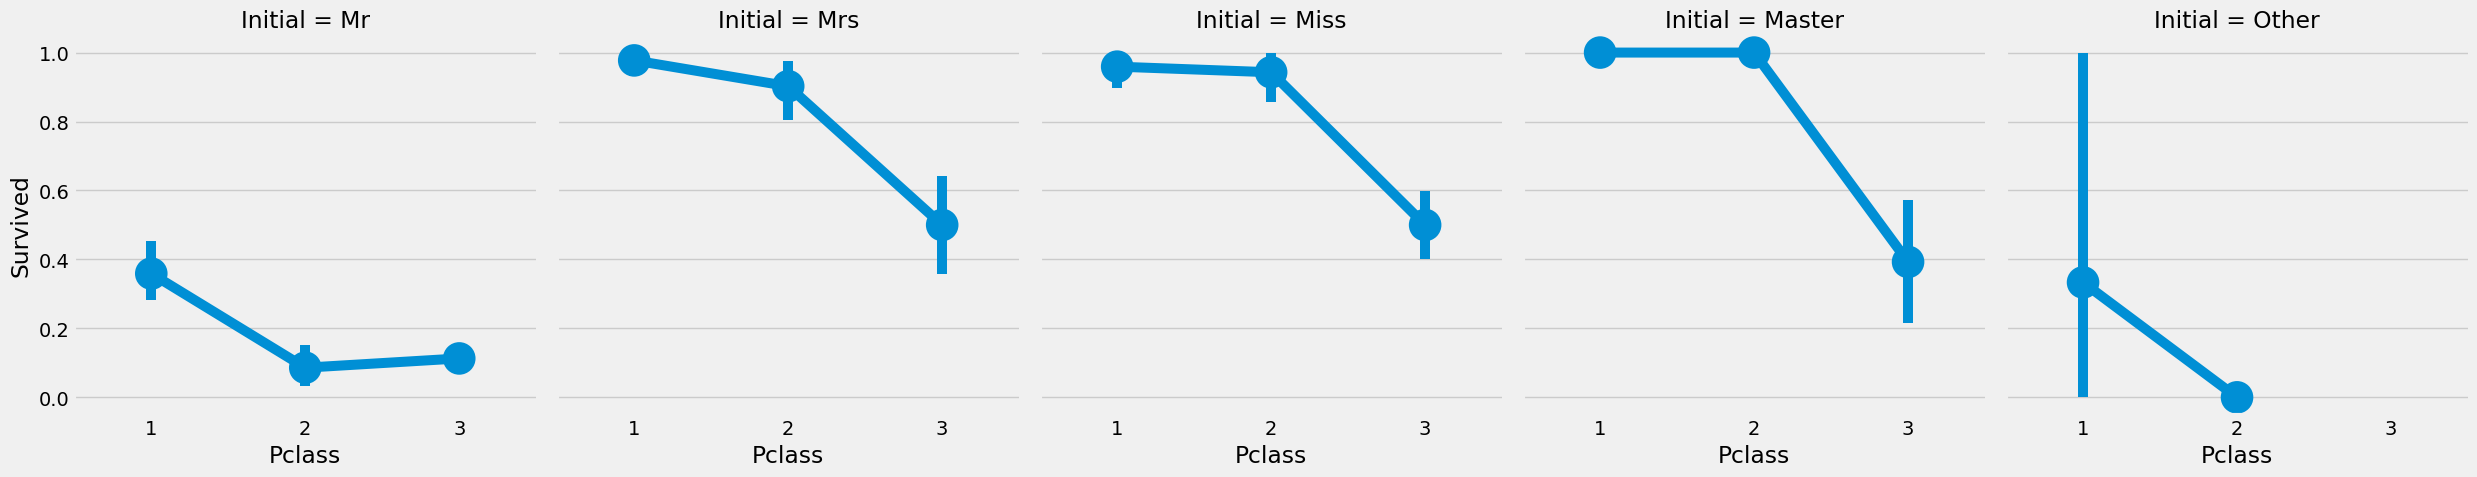

In [21]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data,kind='point')
plt.show()

### 1-2-4. Embarked (Categorical Value)

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap="summer_r")

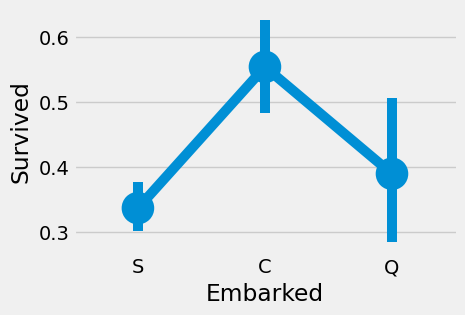

In [23]:
sns.catplot(x='Embarked',y='Survived',data=data,kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- C에서 탑승한 경우 생존확률이 약 55%로 가장 높고
- S에서 탑승한 경우 가장 낮음.

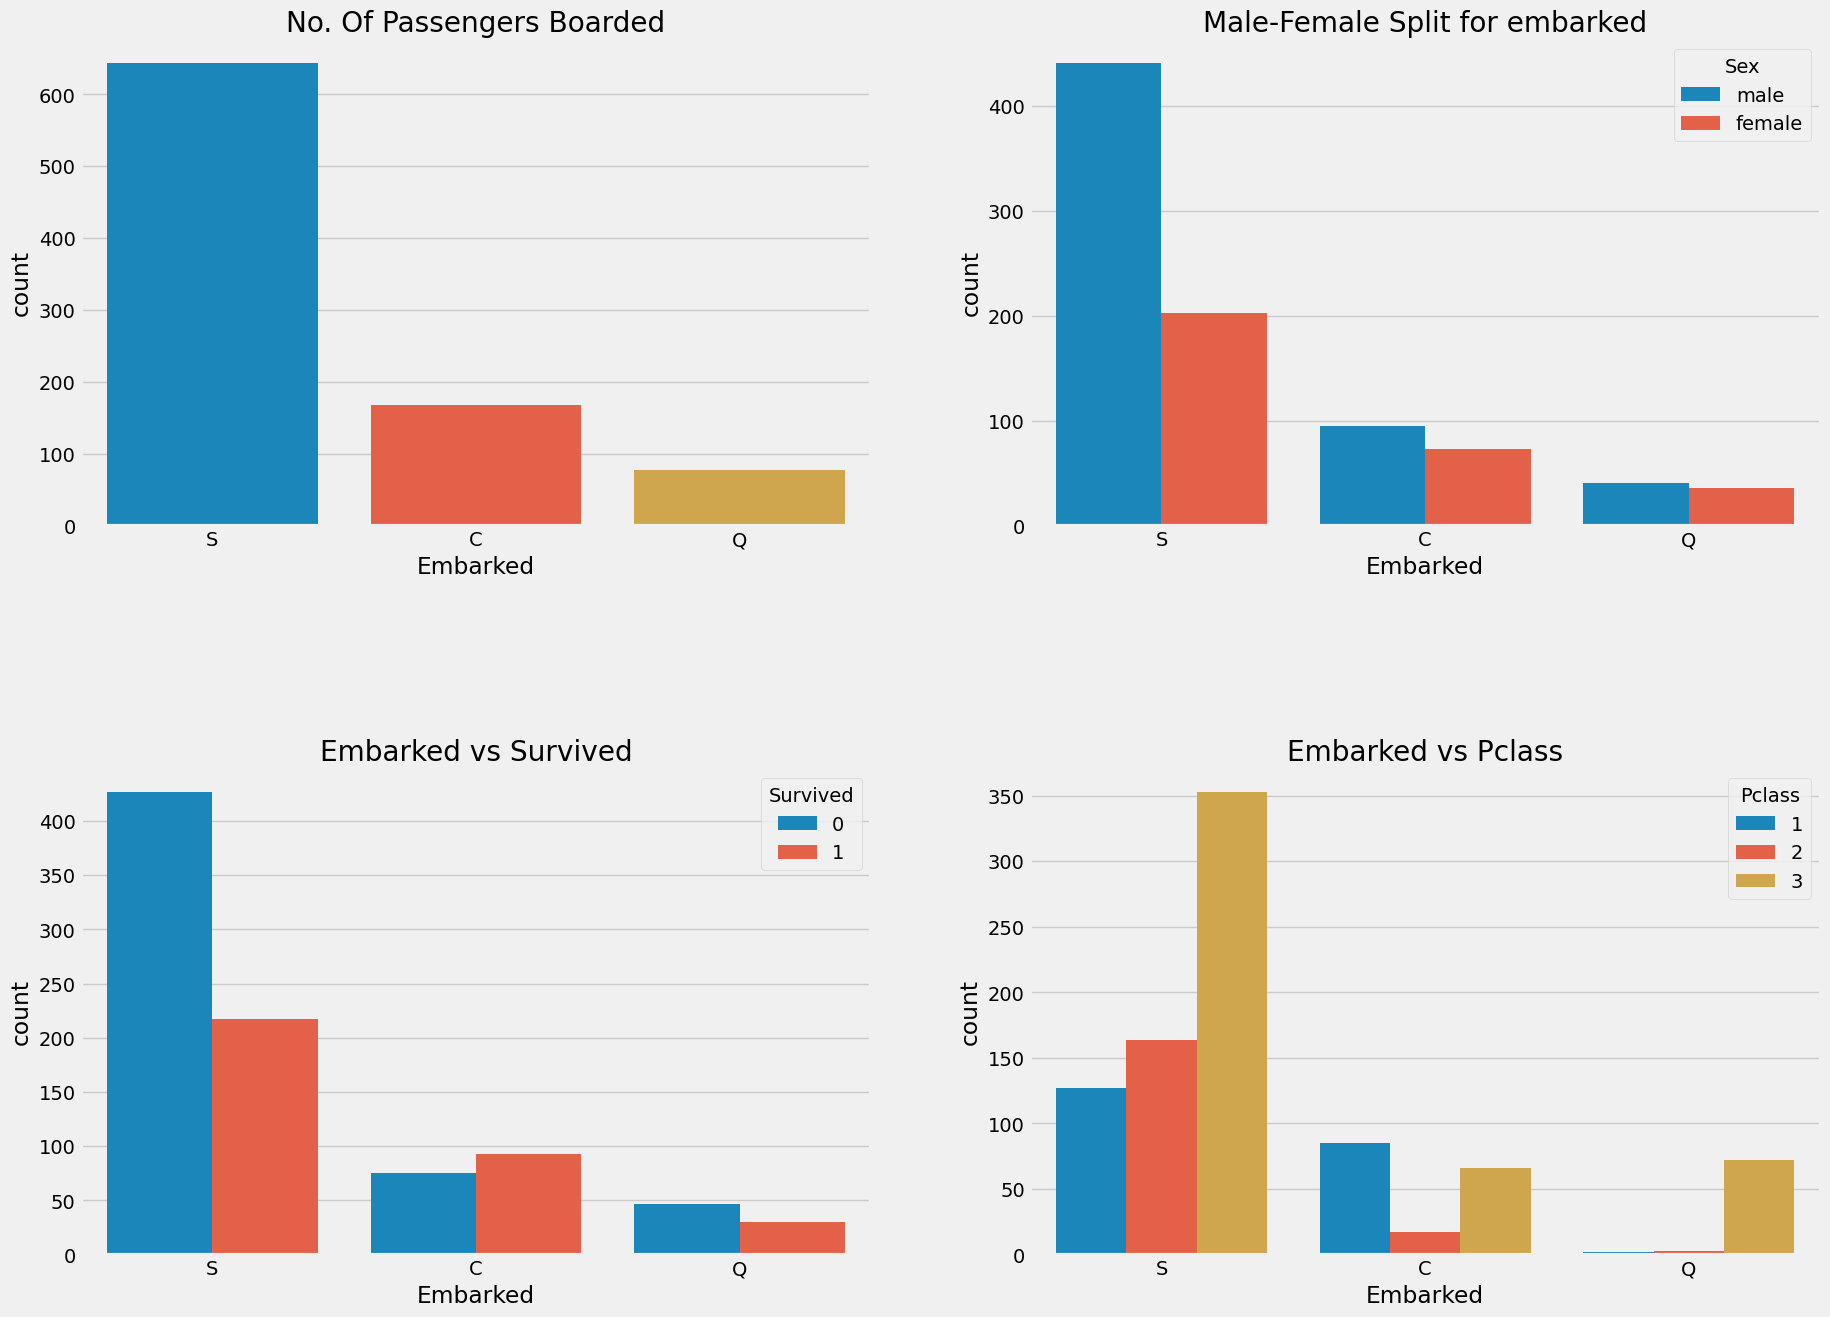

In [24]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data = data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- S에서 가장 많은 탑승함. 대부분이 Pclass 3의 탑승객임.
- C의 탑승객은 상당수가 생존함.
- S는 부유한 탑승객들이 탑승한 항구이나, 81%의 Pclass3 승객이 생존하지 못했기 때문에 생존 가능성이 낮음.
- Q항구의 승객 95%가까이가 Pclass3임.

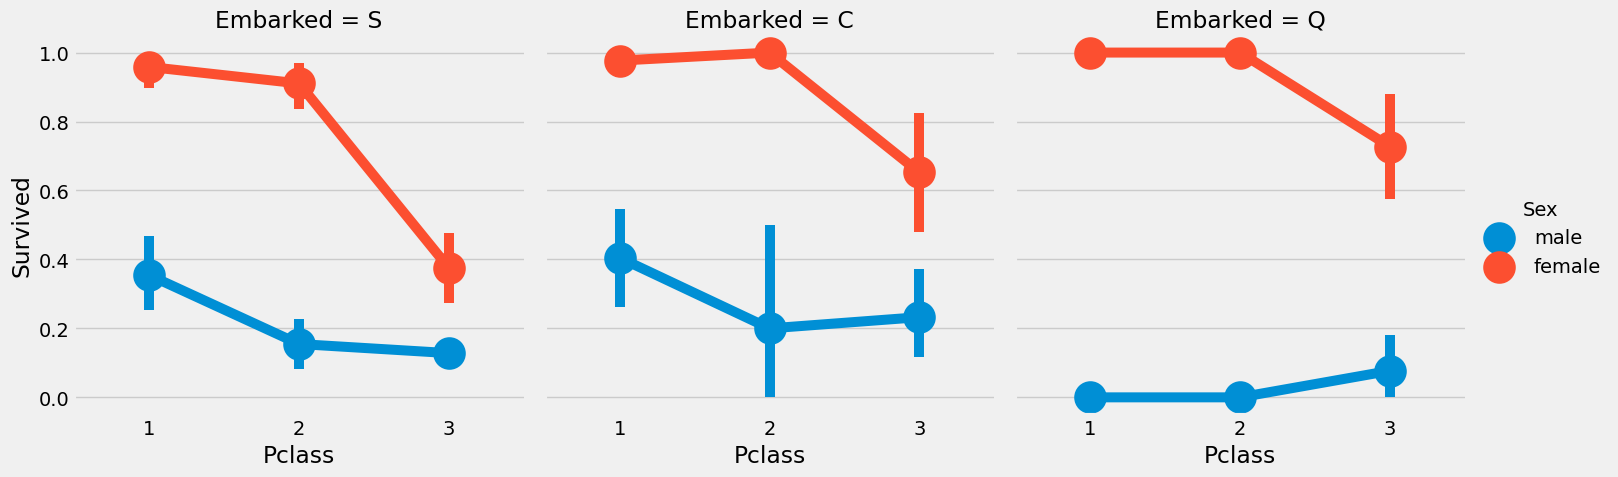

In [25]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data,kind="point")
plt.show()

- 여성의 생존확률은 Pclass에 관계 없이 Pclass1과 Pclass2에 대해 거의 우선임.
- 포트 S의 Pclass 3 남성과 여성의 생존확률은 매우 낮음.

S항에서 최대 승객이 탑승하였으므로 NaN값을 S로 대체함.

In [26]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

False

### 1-2-4. SibSip (Discrete Feature)

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [27]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0
